Accuracy: 0.8155

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.19      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000



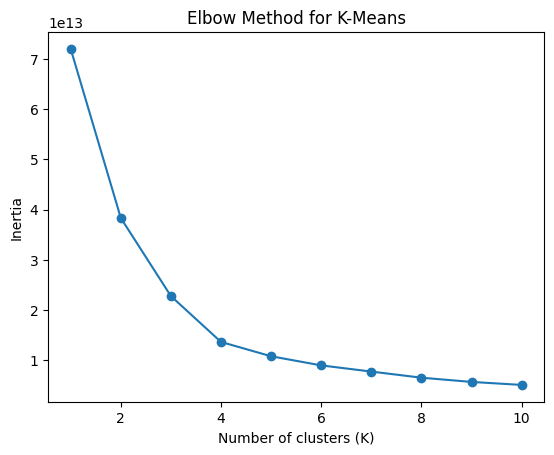

Clustering completed. Files saved successfully.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ===== Step 1: Load Dataset =====
file_path = r"C:\Users\user\OneDrive\Desktop\sasangan\bank churn problem\churn.csv"
df = pd.read_csv(file_path)

# ===== Step 2: Encode categorical features =====
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])

# ===== Step 3: Create a new combined column =====
df['BalanceSalaryRatio'] = df['Balance'] / (df['EstimatedSalary'] + 1e-9)

# ===== Step 4: Save updated dataset to Excel =====
df.to_excel(r"C:\Users\user\OneDrive\Desktop\sasangan\bank churn problem\churn_with_ratio.xlsx", index=False)

# ===== Step 5: Prepare data for training =====
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ===== Step 6: Fit Logistic Regression Model =====
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ===== Step 7: K-Means Clustering =====
df_cluster = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)

# Elbow method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.show()

# Fit K-Means with chosen K (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_cluster)

# Save clustered data
df.to_excel(r"C:\Users\user\OneDrive\Desktop\sasangan\bank churn problem\churn_with_clusters.xlsx", index=False)

print("Clustering completed. Files saved successfully.")


In [8]:
import pandas as pd

# Correct raw string path (paste yours here)
file_path = r"C:\Users\user\OneDrive\Desktop\sasangan\bank churn problem\churn_dataset.csv"

# Load dataset
df = pd.read_csv(file_path)

# Create Pivot Table
pivot_df = pd.pivot_table(
    df,
    values='Balance',
    index='Geography',
    columns='Gender',
    aggfunc='mean'
)

# Save pivot table to Excel
pivot_df.to_excel(r"C:\Users\user\OneDrive\Desktop\sasangan\bank churn problem\churn_pivot.xlsx")

print("Pivot table created and saved successfully.")


Pivot table created and saved successfully.


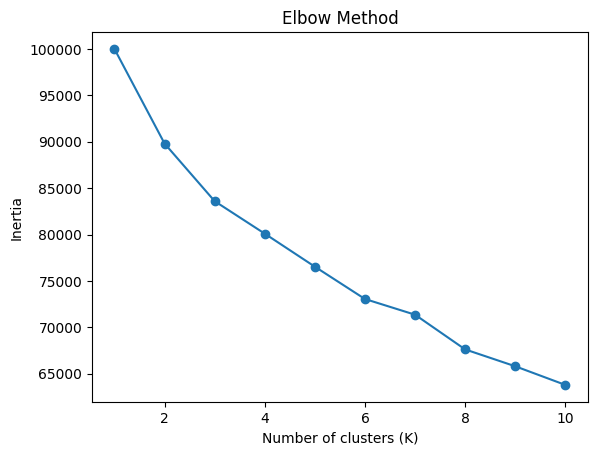

   Geography  Gender  Age    Balance  Cluster
0          0       0   42       0.00        0
1          2       0   41   83807.86        0
2          0       0   42  159660.80        0
3          0       0   39       0.00        1
4          2       0   43  125510.82        0
Cluster
2    3489
1    3307
0    3204
Name: count, dtype: int64


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset
file_path = r"C:\Users\user\OneDrive\Desktop\sasangan\bank churn problem\churn.csv"
df = pd.read_csv(file_path)

# Encode categorical features
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])

# Drop irrelevant columns
df_cluster = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)

# Feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Elbow method to choose K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Fit KMeans with chosen K (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Check first few rows with cluster labels
print(df[['Geography', 'Gender', 'Age', 'Balance', 'Cluster']].head())

# Check cluster distribution
print(df['Cluster'].value_counts())


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = r"C:\Users\user\OneDrive\Desktop\sasangan\bank churn problem\churn.csv"
df = pd.read_csv(file_path)

# ===== Step 1: Encode categorical columns =====
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0
df['Geography'] = le.fit_transform(df['Geography'])

# ===== Step 2: Drop irrelevant columns =====
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# ===== Step 3: Define features (X) and target (y) =====
X = df.drop('Exited', axis=1)
y = df['Exited']

# ===== Step 4: Split into training and testing sets =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===== Step 5: Feature scaling =====
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ===== Step 6: Train a Logistic Regression model =====
model = LogisticRegression()
model.fit(X_train, y_train)

# ===== Step 7: Predictions =====
y_pred = model.predict(X_test)

# ===== Step 8: Evaluation =====
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8155

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000



In [1]:
import pandas as pd

# Path to your file
file_path = r"C:\Users\user\OneDrive\Desktop\sasangan\bank churn problem\churn.csv"

# Load the CSV into a DataFrame
df = pd.read_csv(file_path)

# Show the first 5 rows
print(df.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790